# Tabular Data EDA
Averine Sanduku

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots

import tensorflow as tf
from tensorflow.keras.datasets import imdb

---
### Step 1: Data ingestion

In [2]:

data_dict = pd.read_csv(r'C:\Users\Averine\datasci207_fa24_01_LMRSW\data\data_dictionary.csv')
sample_submission = pd.read_csv(r'C:\Users\Averine\datasci207_fa24_01_LMRSW\data\sample_submission.csv')
test = pd.read_csv(r'C:\Users\Averine\datasci207_fa24_01_LMRSW\data\test.csv')
train = pd.read_csv(r'C:\Users\Averine\datasci207_fa24_01_LMRSW\data\train.csv')


In [13]:


train_size = train.shape
test_size = test.shape
dict_size = data_dict.shape

print(f"Train Data Size: {train_size}")
print(f"Test Data Size: {test_size}")
print(f"Dict Data Size: {dict_size}")


Train Data Size: (3960, 82)
Test Data Size: (20, 59)
Dict Data Size: (81, 6)


In [15]:

# Display the first few rows of each file to understand their structure and contents
print("Train Data:")
display(train.head())

print("Test Data:")
display(test.head())

print("\nData Dictionary:")
display(data_dict.head())


Train Data:


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test Data:


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data Dictionary:


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


---
### Missing Values

In [27]:
# Check for missing values in each dataset
print("Missing values in train data:\n", train.isnull().sum())
print("Missing values in test data:\n", test.isnull().sum())

# Basic information about each dataset
print("Train Data Info:\n", train.info())
print("Test Data Info:\n", test.info())


Missing values in train data:
 id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64
Missing values in test data:
 id                                         0
Basic_Demos-Enroll_Season                  0
Basic_Demos-Age                            0
Basic_Demos-Sex                            0
CGAS-Season                               10
CGAS-CGAS_Score                           12
Physical-Season                            6
Physical-BMI                               7
Physical-Height                      

## Numerical and Categorical Summary Statistics

In [8]:
print("\nNumerical Summary Statistics:")
print(train.describe())

print("\nCategorical Summary Statistics:")
for col in train.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(train[col].value_counts())



Numerical Summary Statistics:
       Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.567287   
min       

---
### STEP 2: Data Processing

In [17]:
# Identify columns unique to train and test
train_only_columns = set(train.columns) - set(test.columns)
test_only_columns = set(test.columns) - set(train.columns)

# Find descriptions for columns unique to train in the data dictionary
train_only_desc = data_dict[data_dict['Field'].isin(train_only_columns)]

# Find descriptions for columns unique to test in the data dictionary
test_only_desc = data_dict[data_dict['Field'].isin(test_only_columns)]

# Display results
print("Descriptions for columns in train but not in test:")
print(train_only_desc[['Field', 'Description']])

print("\nDescriptions for columns in test but not in train:")
print(test_only_desc[['Field', 'Description']])

Descriptions for columns in train but not in test:
                Field                                        Description
54       PCIAT-Season                            Season of participation
55     PCIAT-PCIAT_01  How often does your child disobey time limits ...
56     PCIAT-PCIAT_02  How often does your child neglect household ch...
57     PCIAT-PCIAT_03  How often does your child prefer to spend time...
58     PCIAT-PCIAT_04  How often does your child form new relationshi...
59     PCIAT-PCIAT_05  How often do you complain about the amount of ...
60     PCIAT-PCIAT_06  How often do your child's grades suffer becaus...
61     PCIAT-PCIAT_07  How often does your child check his or her e-m...
62     PCIAT-PCIAT_08  How often does your child seem withdrawn from ...
63     PCIAT-PCIAT_09  How often does your child become defensive or ...
64     PCIAT-PCIAT_10  How often have you caught your child sneaking ...
65     PCIAT-PCIAT_11  How often does your child spend time along in ...


In [24]:
train_df_filtered.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Identify columns in train that are not in test, excluding "sii" as we need it as the target
train_only_columns = set(train.columns) - set(test.columns)
train_only_columns.discard("sii")  # Ensure "sii" is kept as it's the output target

# Drop the identified columns from train
train_df_filtered = train.drop(columns=train_only_columns)

# Display the shape and columns of the filtered train DataFrame to verify
print("Filtered Train DataFrame Shape:", train_df_filtered.shape)
print("Filtered Train DataFrame Columns:", train_df_filtered.columns.tolist())

Filtered Train DataFrame Shape: (3960, 60)
Filtered Train DataFrame Columns: ['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BI

---
### Step 3: EDA

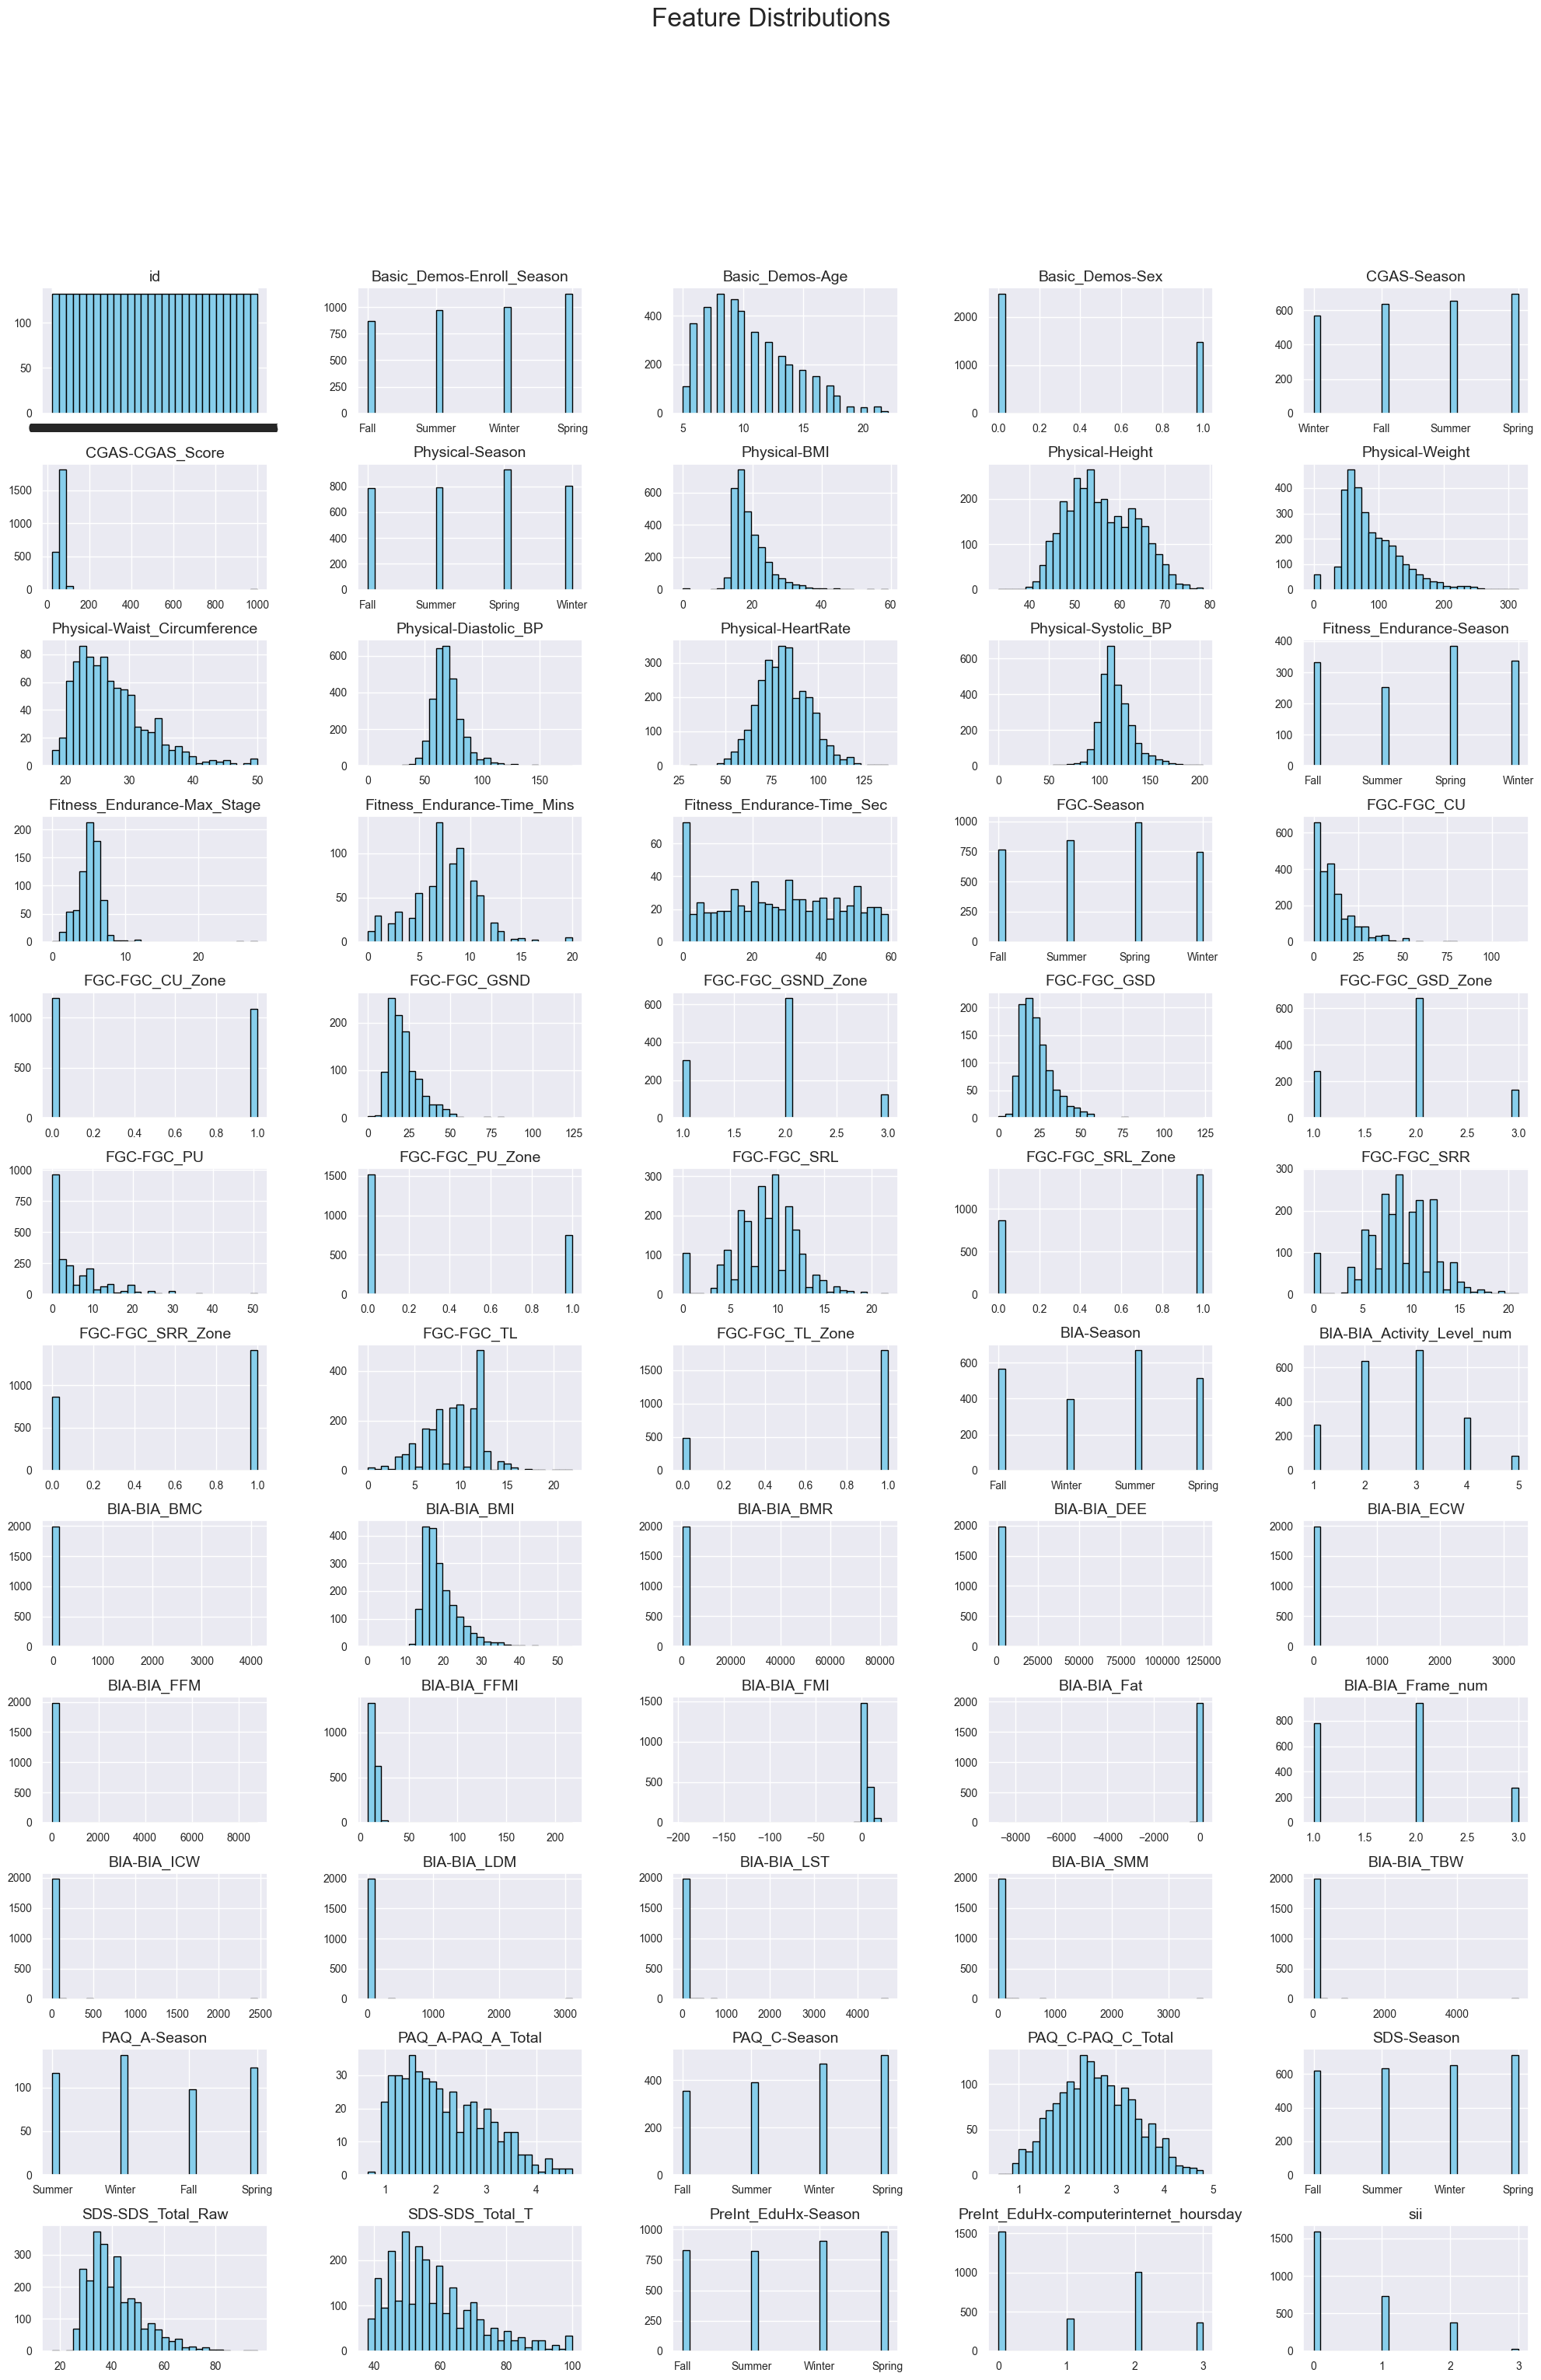

In [22]:

# Set up a larger figure size with individual subplots for each feature's histogram
fig, axes = plt.subplots(nrows=12, ncols=5, figsize=(20, 30))  # Adjust rows and columns as needed
fig.suptitle("Feature Distributions", fontsize=24, y=1.02)  # Title above all plots with larger font size

# Flatten the axes array for easy iteration, if there are fewer plots than grid cells
axes = axes.flatten()

# Plot a histogram for each feature
for i, column in enumerate(train_df_filtered.columns):
    if i < len(axes):  # Avoid error if there are more subplots than columns
        train_df_filtered[column].hist(bins=30, ax=axes[i], color="skyblue", edgecolor="black")
        axes[i].set_title(column, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent title overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)  # Adjust hspace and wspace as needed
plt.show()


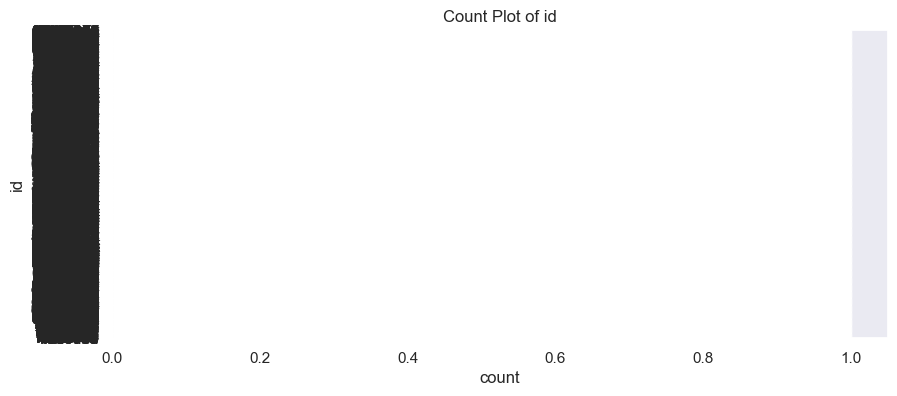

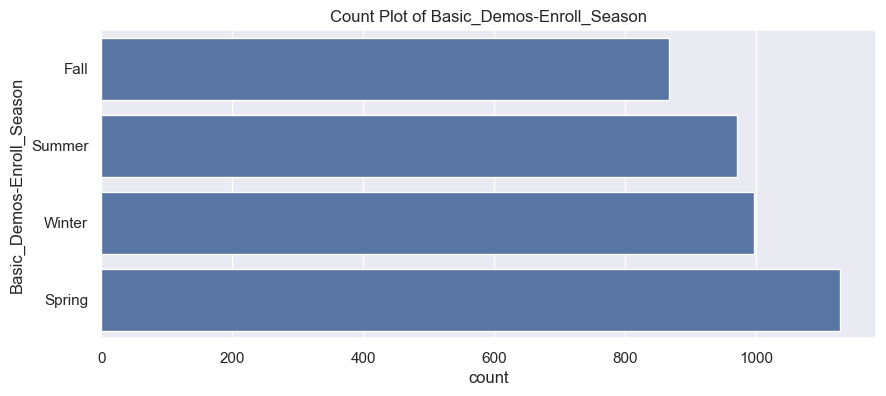

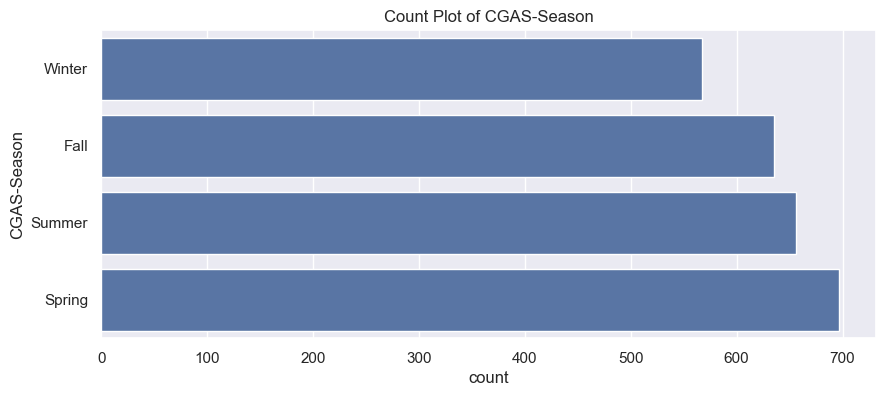

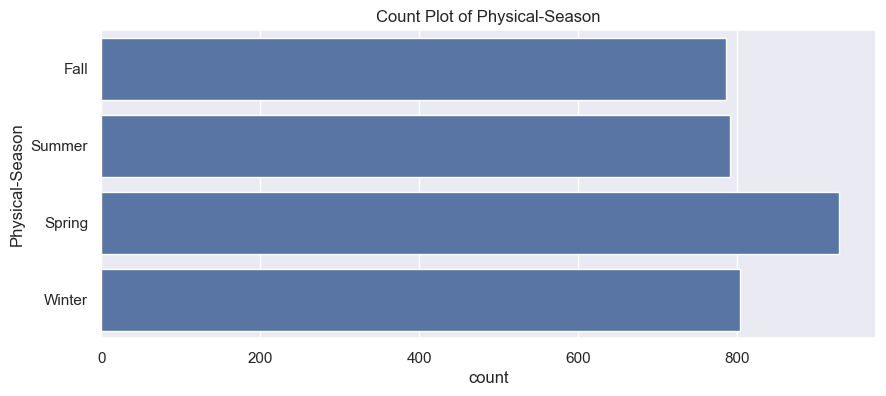

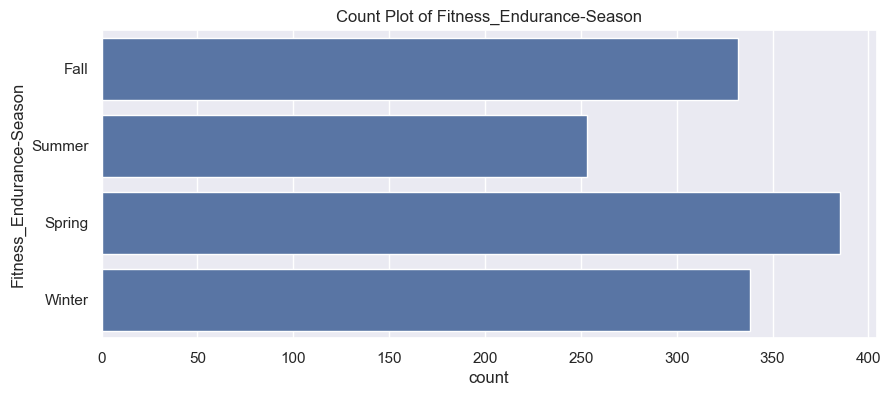

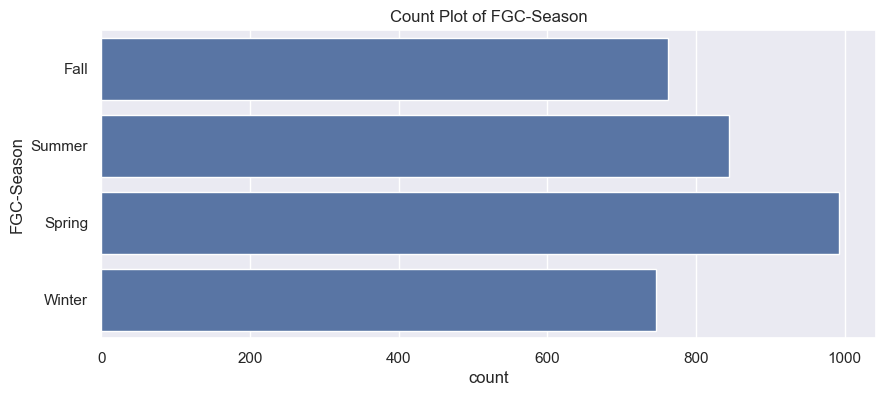

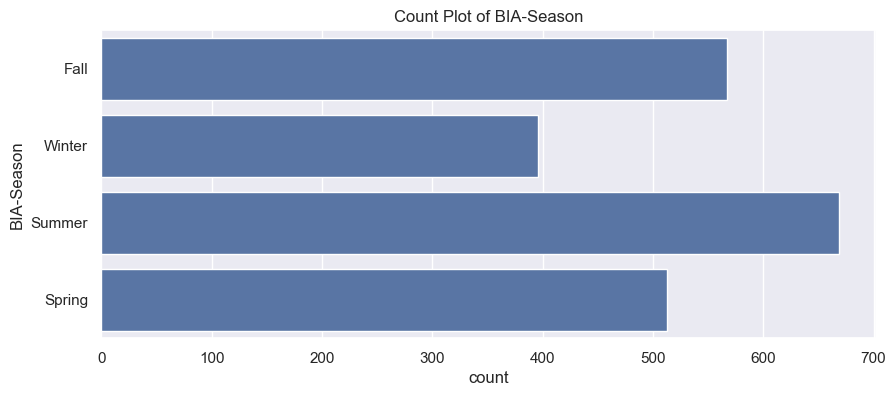

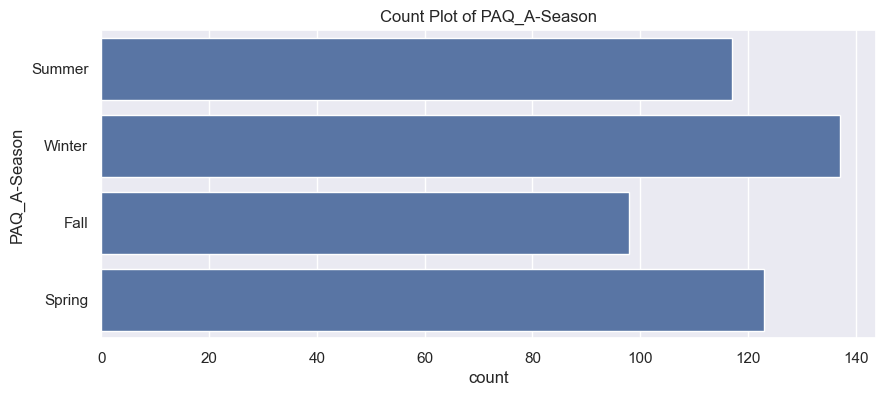

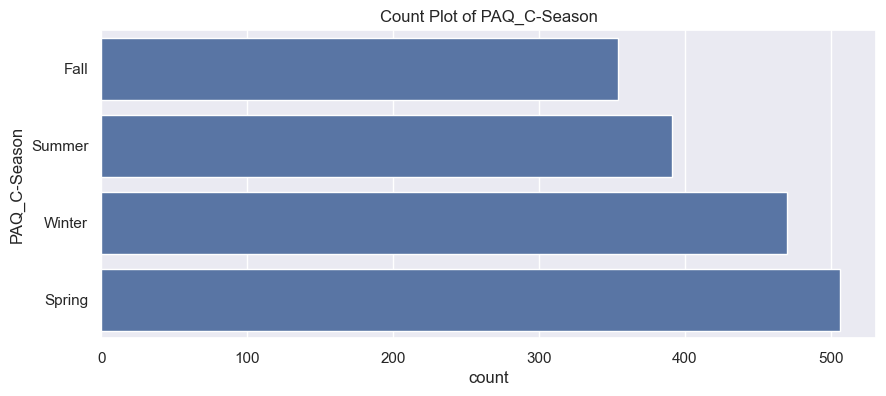

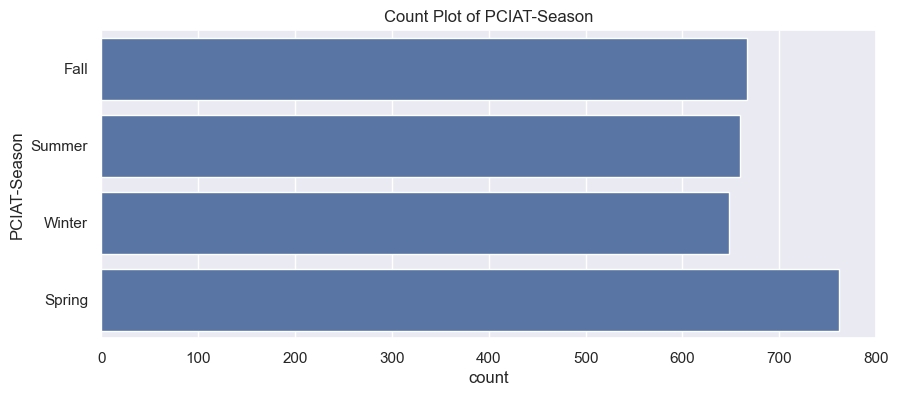

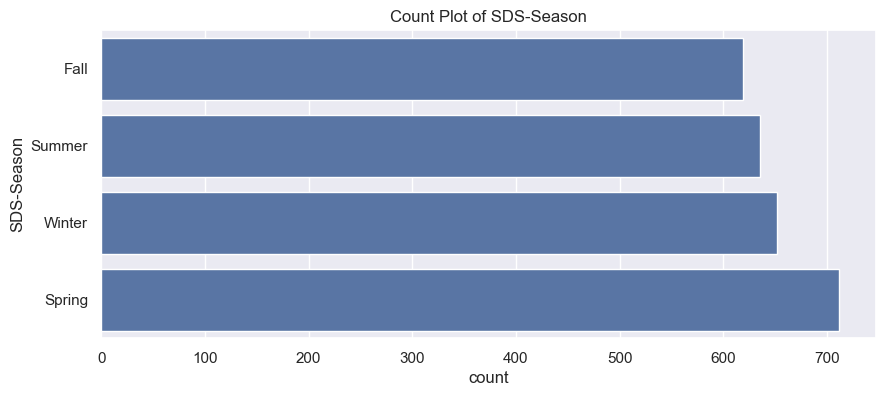

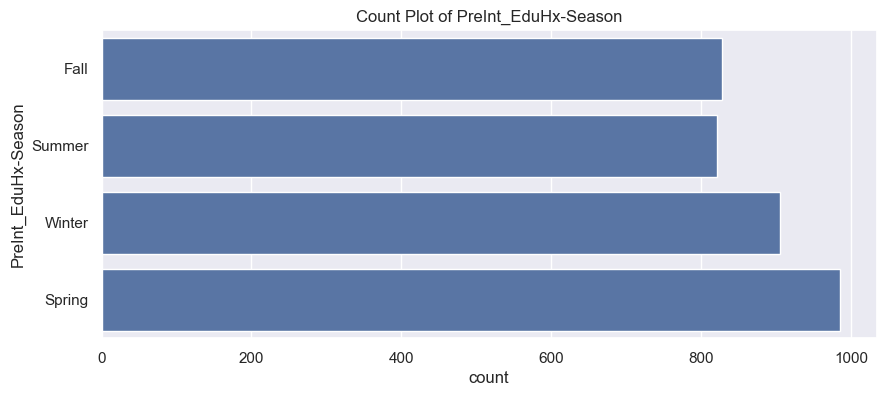

In [23]:
for col in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=train)
    plt.title(f"Count Plot of {col}")
    plt.show()


In [14]:
# Example: Look up specific field descriptions in data_dictionary
field_descriptions = data_dict[data_dict['Field'].isin(train.columns)]
print("\nField Descriptions from Data Dictionary:")
print(field_descriptions[['Field', 'Description', 'Type', 'Values', 'Value Labels']])



Field Descriptions from Data Dictionary:
                                     Field                       Description  \
0                                       id                  Participant's ID   
1                Basic_Demos-Enroll_Season              Season of enrollment   
2                          Basic_Demos-Age                Age of participant   
3                          Basic_Demos-Sex                Sex of participant   
4                              CGAS-Season           Season of participation   
..                                     ...                               ...   
76                              SDS-Season           Season of participation   
77                       SDS-SDS_Total_Raw                   Total Raw Score   
78                         SDS-SDS_Total_T                     Total T-Score   
79                     PreInt_EduHx-Season           Season of participation   
80  PreInt_EduHx-computerinternet_hoursday  Hours of using computer/internet  

# Adjusted EDA Based on Field Descriptions

Handle Categorical Variables with Encoded Values

1. Map Encoded Fields to Labels:

For Basic_Demos-Sex (0=Male, 1=Female, assuming based on common practice), and similar fields with encoded values in the Values or Value Labels columns.

In [25]:
# Map Sex
train['Basic_Demos-Sex'] = train['Basic_Demos-Sex'].map({0: 'Male', 1: 'Female'})

# Map computer/internet hours/day
internet_usage_map = {
    0: 'Less than 1h/day',
    1: 'Around 1h/day',
    2: 'Around 2h/day',
    3: 'Around 3h/day'
}
train['PreInt_EduHx-computerinternet_hoursday'] = train['PreInt_EduHx-computerinternet_hoursday'].map(internet_usage_map)


2. Visualize Season-based Variables
Several fields, such as Basic_Demos-Enroll_Season and CGAS-Season, have seasonal values (Spring, Summer, Fall, Winter).



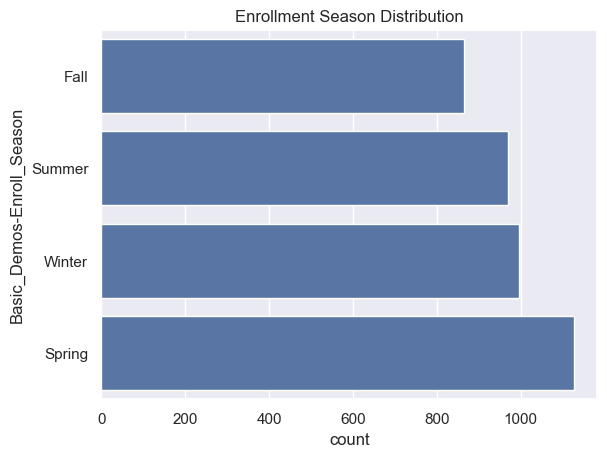

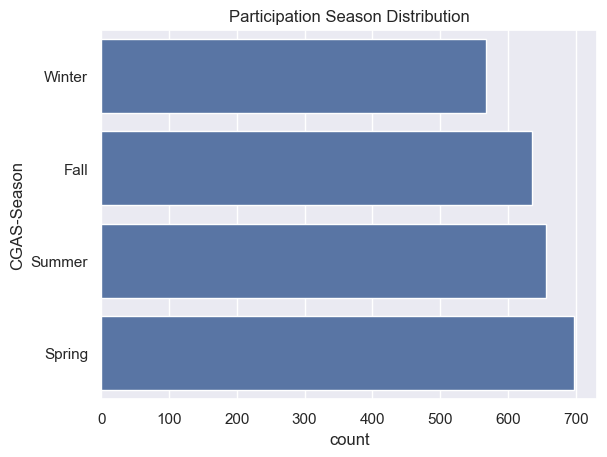

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot season distributions
sns.countplot(y='Basic_Demos-Enroll_Season', data=train)
plt.title("Enrollment Season Distribution")
plt.show()

sns.countplot(y='CGAS-Season', data=train)
plt.title("Participation Season Distribution")
plt.show()


3. Numerical Variables Analysis
    Variables like SDS-SDS_Total_Raw and SDS-SDS_Total_T are raw and T-scores.

Histograms and Box Plots:



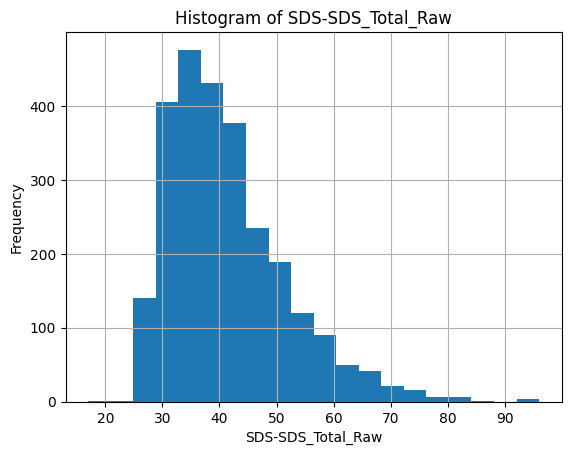

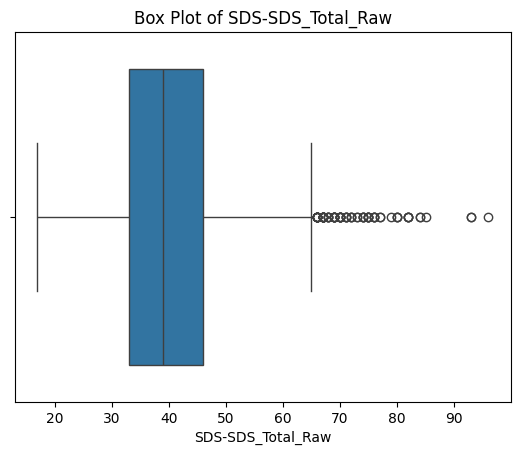

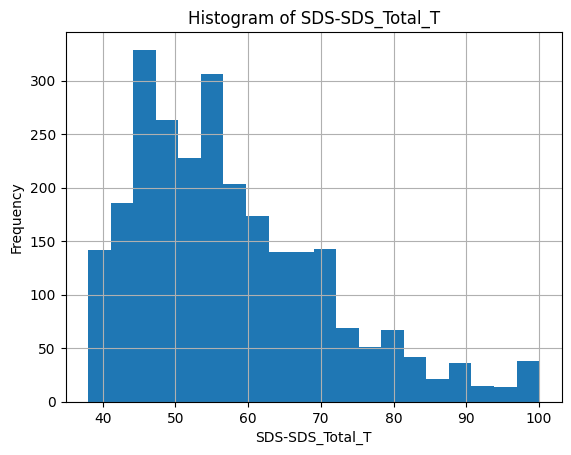

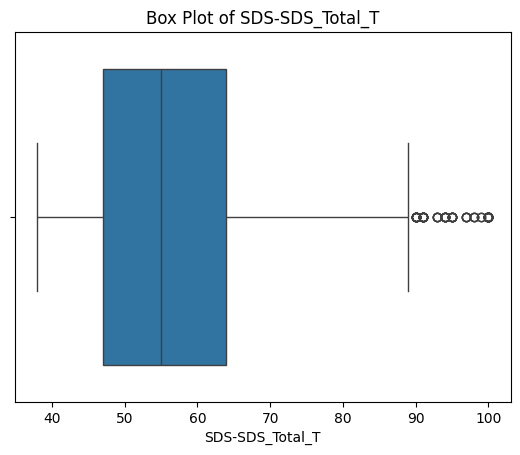

In [17]:
# Histograms for score fields
score_columns = ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']
for col in score_columns:
    train[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    sns.boxplot(x=train[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


4. Look at Age Distributions
Since Basic_Demos-Age is a float (likely participant’s age in years), visualize its distribution to understand the age range of participants.

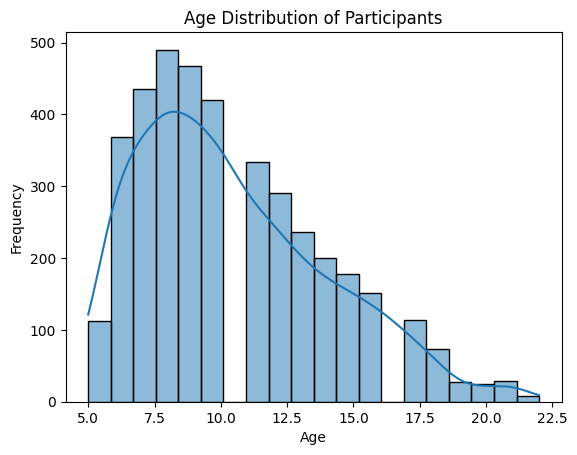

In [18]:
# Age distribution
sns.histplot(train['Basic_Demos-Age'], bins=20, kde=True)
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


C:\Users\Averine\AppData\Local\Temp\ipykernel_18136\2656204850.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sii_corr.index, x=sii_corr.values, palette="coolwarm")


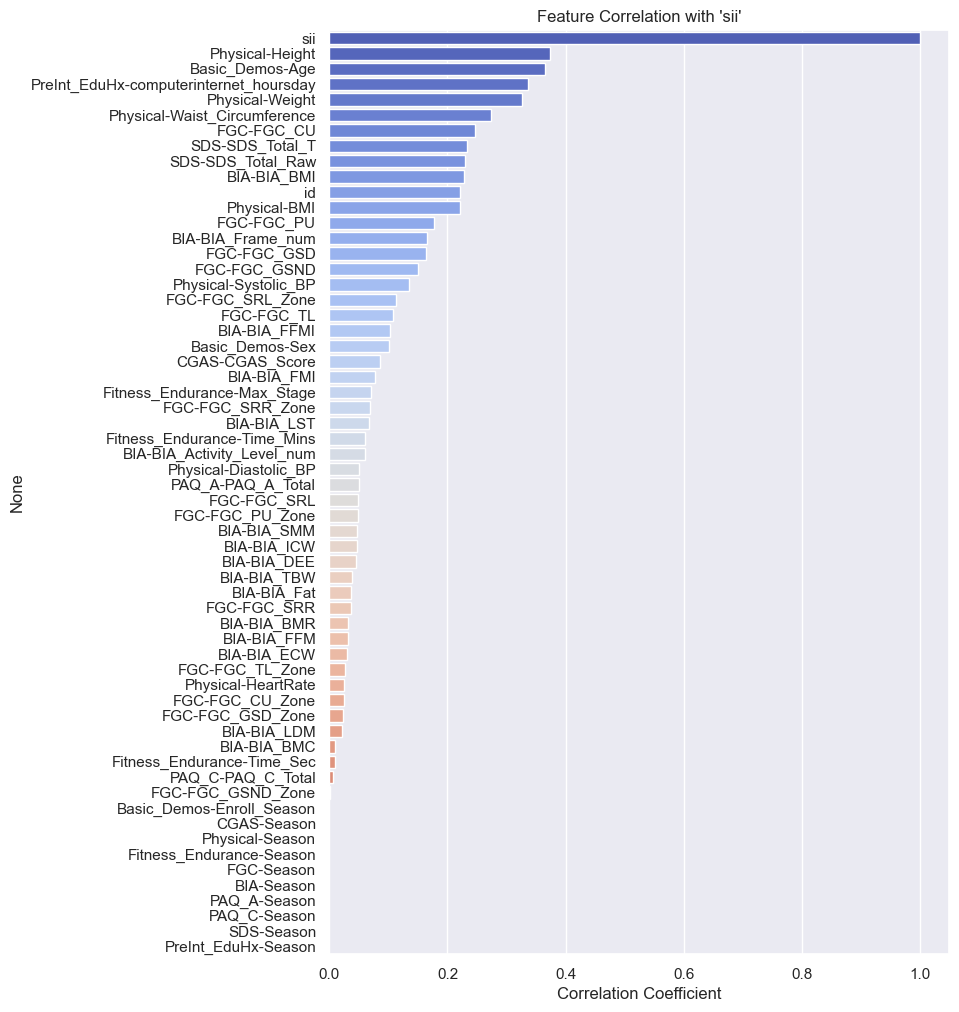


Highly correlated feature pairs (threshold > 0.8):
Basic_Demos-Age and Physical-Height: correlation = 0.8802735016280138
Physical-BMI and Physical-Weight: correlation = 0.8656617384773483
Physical-BMI and Physical-Waist_Circumference: correlation = 0.8921491806097692
Physical-BMI and BIA-BIA_BMI: correlation = 0.9688486364004516
Physical-Height and Physical-Weight: correlation = 0.8338438957591704
Physical-Weight and Physical-Waist_Circumference: correlation = 0.9167097637653835
Physical-Weight and BIA-BIA_BMI: correlation = 0.8580360777804208
Physical-Waist_Circumference and BIA-BIA_BMI: correlation = 0.9205389090042684
Physical-Waist_Circumference and BIA-BIA_BMR: correlation = 0.8306690853187516
Physical-Waist_Circumference and BIA-BIA_ECW: correlation = 0.8181220614322553
Physical-Waist_Circumference and BIA-BIA_FFM: correlation = 0.8306693119860195
Physical-Waist_Circumference and BIA-BIA_FFMI: correlation = 0.8094472958662992
Physical-Waist_Circumference and BIA-BIA_FMI: correla

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load train data if not already loaded
# train_df = pd.read_csv('train.csv')  # Uncomment if not yet loaded

# Filter train data if necessary (make sure train_df_filtered exists if referenced)
# train_df_filtered = train_df.drop(columns=['columns_to_drop'])  # Example filtering step

# Calculate the correlation matrix
corr_matrix = train_df_filtered.corr()

### Step 1: Find Correlations with "sii" ###

# Get correlations with "sii" and sort by absolute value to see strongest correlations at the top
sii_corr = corr_matrix['sii'].abs().sort_values(ascending=False)

# Plot correlations with "sii"
plt.figure(figsize=(8, 12))
sns.barplot(y=sii_corr.index, x=sii_corr.values, palette="coolwarm")
plt.title("Feature Correlation with 'sii'")
plt.xlabel("Correlation Coefficient")
plt.show()

### Step 2: Identify Highly Correlated Feature Pairs ###

# Set a correlation threshold to identify highly correlated pairs
correlation_threshold = 0.8

# Find pairs of features with high correlation (absolute value above the threshold)
# Only keep each pair once by ensuring (feature_b, feature_a) is not added if (feature_a, feature_b) was added
high_corr_pairs = []
for feature_a in corr_matrix.columns:
    for feature_b in corr_matrix.columns:
        if feature_a != feature_b and abs(corr_matrix.loc[feature_a, feature_b]) > correlation_threshold:
            if (feature_b, feature_a) not in high_corr_pairs:
                high_corr_pairs.append((feature_a, feature_b))

# Display highly correlated feature pairs
print("\nHighly correlated feature pairs (threshold > 0.8):")
for feature_a, feature_b in high_corr_pairs:
    print(f"{feature_a} and {feature_b}: correlation = {corr_matrix.loc[feature_a, feature_b]}")


## Suggested Feature Reductions for Dataset
Based on the provided correlations, here’s a potential approach to reduce features:

Physical Attributes:

Keep Physical-BMI and drop Physical-Weight, Physical-Waist_Circumference.
Drop Physical-Height if Basic_Demos-Age provides more meaningful insights.
BIA Measures:

Keep only one feature from the BIA set that best represents body composition (e.g., BIA-BIA_BMR), and drop the others like BIA-BIA_ECW, BIA-BIA_FFM, and so on.
Endurance and FGC Scores:

Retain one of the correlated features in each pair, like Fitness_Endurance-Max_Stage and Fitness_Endurance-Time_Mins, or create a composite metric if needed.

In [33]:
# Select only numeric columns for correlation matrix
train_df_filtered_numeric = train_df_filtered.select_dtypes(include='number')

# Calculate the correlation matrix on numeric-only columns
corr_matrix = train_df_filtered_numeric.corr()


In [35]:
# Attempt to convert columns to numeric, coercing errors to NaN
for col in train_df_filtered.columns:
    train_df_filtered[col] = pd.to_numeric(train_df_filtered[col], errors='coerce')


In [ ]:
# Drop any known identifier columns, like 'id', before computing correlation
train_df_filtered = train_df_filtered.drop(columns=['id'])  # Update 'id' to your specific identifier column name
